# 이전 게시물

[1편. 이상탐지 너 뭐야?](https://dacon.io/codeshare/4758)  
[2편. 신용카드 사기 탐지(1부)](https://dacon.io/codeshare/4833)  
[3편. 신용카드 사기 탐지(2부)](https://dacon.io/codeshare/4853)  

# **contents**  
## **MNIST 데이터 셋을 이용한 차원 축소 기법 소개**  

### 1.import library  
### 2.load the datasets  
### 3.verify shape of datasets  
### 4.create pandas dataframe from the dataset  
### 5.describe the training matrix  
### 6.define function to view digit/view digit  
### 7.define one-hot encoder function  
### 8.demensianlity reduction algorithm  

* SVD
* 랜덤 투영
* LLE
* t-SNE
* 사전 학습
* ICA 

😃안녕하세요 **Team.Zoo** 입니다.😃
저희는 이번주에 '핸즈온 비지도 학습'교재의 차원 축소 파트를 공부하고 해당 교재 내에 있는 MNIST데이터를 실습하는 시간을 가졌습니다. 이번시간에 소개드릴 차원 축소 기법은 
* 랜덤 투영
* SVD
* LLE
* t-SNE
* 사전 학습
* ICA 

입니다.

이상 탐지 시스템을 구축하기 전에 차원 축소를 다루는 것은 비지도 학습 분야에서 급속히 성장하고 있는 유형이자 중요한 현상인데요!

MNIST데이터셋을 가지고 어떻게 차원 축소 알고리즘을 사용해야 하는지 다뤄 보겠습니다:>!

In [ ]:
from google.colab import drive
drive.mount._DEBUG = True
drive.mount('/content/drive', force_remount=True)

unset HISTFILE; export PS1="root@05239a0ade8a-4f98e0b0c5514292bbc199289f6f437a: "
bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
/content# root@05239a0ade8a-4f98e0b0c5514292bbc199289f6f437a: umount -f /content/drive || umount /content/drive; pkill -9 -x drive
umount: /content/drive: no mount point specified.
umount: /content/drive: no mount point specified.
root@05239a0ade8a-4f98e0b0c5514292bbc199289f6f437a: pkill -9 -f /opt/google/drive/directoryprefetcher_binary
root@05239a0ade8a-4f98e0b0c5514292bbc199289f6f437a: ( while `sleep 0.5`; do if [[ -d "/content/drive" && "$(ls -A /content/drive)" != "" ]]; then echo "google.colab.drive MOUNTED"; break; fi; done ) &
[1] 131
root@05239a0ade8a-4f98e0b0c5514292bbc199289f6f437a: ( /opt/google/drive/drive --features=fuse_max_background:1000,max_read_qps:1000,max_write_qps:1000,max_operation_batch_size:15,max_parallel_push_task_instances:10,opendir_timeout_ms:120000,virtual_folders_

#### 1.Import library

알고리즘을 사용하기 전 사용할 라이브러리를 먼저 로드하였습니다.

In [ ]:
# Import libraries
'''Main'''
import numpy as np
import pandas as pd
import os, time, pickle, gzip
import datetime

'''Data Prep'''
from sklearn import preprocessing as pp 

'''Data Viz'''
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import gzip

In [ ]:
import os
os.chdir('/content/drive/MyDrive/dacrew/4주차')

### 2.Load the datasets

In [ ]:
# Load the datasets


f = gzip.open('/content/drive/MyDrive/대외활동/데이크루/4주차/mnist.pkl.gz', 'rb')
train_set, validation_set, test_set = pickle.load(f, encoding='latin1')
f.close()

X_train, y_train = train_set[0], train_set[1]
X_validation, y_validation = validation_set[0], validation_set[1]
X_test, y_test = test_set[0], test_set[1]

### 3.Verify shape of datasets

잘 로드 되었는지 구조를 확인하고, 효율적인 탐색 작업을 위해서
넘파이 배열을 팬더스 데이터 프레임으로 변환하였습니다.

In [ ]:
# Verify shape of datasets
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_validation: ", X_validation.shape)
print("Shape of y_validation: ", y_validation.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (50000, 784)
Shape of y_train:  (50000,)
Shape of X_validation:  (10000, 784)
Shape of y_validation:  (10000,)
Shape of X_test:  (10000, 784)
Shape of y_test:  (10000,)


### 4.Create Pandas DataFrames from the datasets

In [ ]:
# Create Pandas DataFrames from the datasets
train_index = range(0,len(X_train))
validation_index = range(len(X_train), \
                         len(X_train)+len(X_validation))
test_index = range(len(X_train)+len(X_validation), \
                   len(X_train)+len(X_validation)+len(X_test))

X_train = pd.DataFrame(data=X_train,index=train_index)
y_train = pd.Series(data=y_train,index=train_index)

X_validation = pd.DataFrame(data=X_validation,index=validation_index)
y_validation = pd.Series(data=y_validation,index=validation_index)

X_test = pd.DataFrame(data=X_test,index=test_index)
y_test = pd.Series(data=y_test,index=test_index)

### 5.Describe the training matrix

In [ ]:
# Describe the training matrix
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,50000.0,50000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000739,0.000354,0.000204,0.000090,0.000071,0.000009,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022778,0.015422,0.012079,0.007217,0.007181,0.001483,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.992188,0.992188,0.988281,0.988281,0.992188,0.242188,0.0,0.0,0.0,0.0


In [ ]:
# Show the labels
y_train.head()

0    5
1    0
2    4
3    1
4    9
dtype: int64

### 6.Define function to view digit/View digit


간단하게 첫번째 이미지를 시각화해 보겠습니다.
(레이블과 함께 볼 수 있는 이미지를 정의하였습니다.)

In [ ]:
# Define function to view digit
def view_digit(example):
    label = y_train.loc[example]
    image = X_train.loc[example,:].values.reshape([28,28])
    plt.title('Example: %d  Label: %d' % (example, label))
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.show()


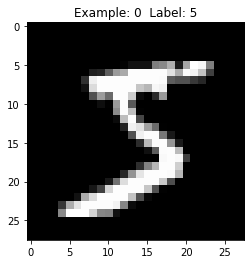

In [ ]:
# View the first digit
view_digit(0)

### 7.Define one-hot encoder function 

In [ ]:
# Define one-hot encoder function
def one_hot(series):
    label_binarizer = pp.LabelBinarizer()
    label_binarizer.fit(range(max(series)+1))
    return label_binarizer.transform(series)

In [ ]:
# Define reversal of one-hot encoder function
def reverse_one_hot(originalSeries, newSeries):
    label_binarizer = pp.LabelBinarizer()
    label_binarizer.fit(range(max(originalSeries)+1))
    return label_binarizer.inverse_transform(newSeries)

In [ ]:
# Create one-hot vectors for the labels
y_train_oneHot = one_hot(y_train)
y_validation_oneHot = one_hot(y_validation)
y_test_oneHot = one_hot(y_test)

In [ ]:
# Show one-hot vector for example 0, which is the number 5
y_train_oneHot[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

### 8.Demensianlity Reduction Algorithm

다음으로는 차원 축소 알고리즘을 살펴보겠습니다:>! 
이전 시간에서도 언급했듯이 차원 축소는 머신러닝에서 차원의 저주를
해결하는데 도움이 되는 알고리즘이라고 볼 수 있겠네요 :>!!

차원 축소 알고리즘은 '중복 정보 제거'와 동시에 '머신러닝 알고리즘'이 적용되어 흥미로운 패턴으로 유의미한 결과를 구현하고 식별할 수 있습니다.

그러나 차원 축소 자체는 머신러닝 파이프라인의 일부분이므로 이상탐지 구축 시스템의 최종 목적이 아니라는 점을 알아두세요!

In [ ]:
# Define scatterplot function 
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)

### SVD

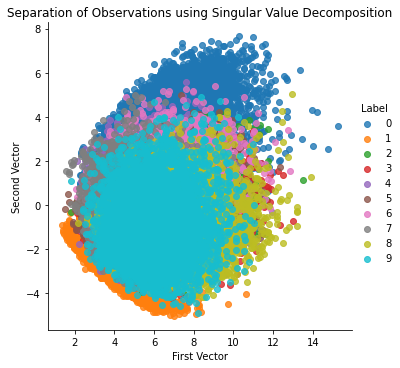

In [ ]:
# Singular Value Decomposition
from sklearn.decomposition import TruncatedSVD

n_components = 200
algorithm = 'randomized'
n_iter = 5
random_state = 2018

svd = TruncatedSVD(n_components=n_components, algorithm=algorithm, \
                   n_iter=n_iter, random_state=random_state)

X_train_svd = svd.fit_transform(X_train)
X_train_svd = pd.DataFrame(data=X_train_svd, index=train_index)

X_validation_svd = svd.transform(X_validation)
X_validation_svd = pd.DataFrame(data=X_validation_svd, index=validation_index)

scatterPlot(X_train_svd, y_train, "Singular Value Decomposition")

먼저 SVD을 살펴보았습니다.
위 PLOT은 SVD을 이용한 관측치의 구분 결과입니다.
X축은 첫 번째 벡터 , Y축은 두 번째 벡터로 가장 많은 정보를 가진 원본 행렬의 벡터를 유지한다는 점에서 PCA 기법과 매우 유사한 방식임을 볼 수 있습니다😁

### random projection

#### gaussian random projection

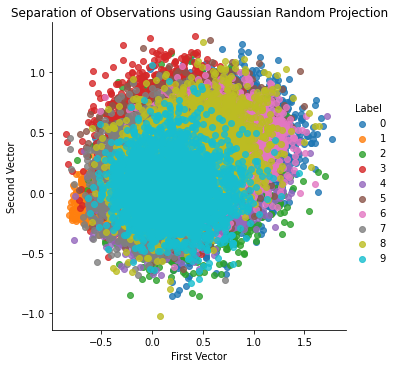

In [ ]:
# Gaussian Random Projection
from sklearn.random_projection import GaussianRandomProjection

n_components = 'auto'
eps = 0.5
random_state = 2018

GRP = GaussianRandomProjection(n_components=n_components, eps=eps, \
                               random_state=random_state)

X_train_GRP = GRP.fit_transform(X_train)
X_train_GRP = pd.DataFrame(data=X_train_GRP, index=train_index)

X_validation_GRP = GRP.transform(X_validation)
X_validation_GRP = pd.DataFrame(data=X_validation_GRP, index=validation_index)

scatterPlot(X_train_GRP, y_train, "Gaussian Random Projection")

#### sparse random projection

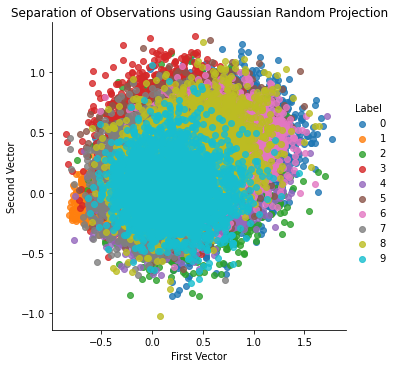

In [ ]:
# Gaussian Random Projection
from sklearn.random_projection import GaussianRandomProjection

n_components = 'auto'
eps = 0.5
random_state = 2018

GRP = GaussianRandomProjection(n_components=n_components, eps=eps, \
                               random_state=random_state)

X_train_GRP = GRP.fit_transform(X_train)
X_train_GRP = pd.DataFrame(data=X_train_GRP, index=train_index)

X_validation_GRP = GRP.transform(X_validation)
X_validation_GRP = pd.DataFrame(data=X_validation_GRP, index=validation_index)

scatterPlot(X_train_GRP, y_train, "Gaussian Random Projection")

2번째 알고리즘은 '랜덤 투영'입니다.
1번째는 일반 버전의 가우시안 랜덤 투영,
2번째는 희소 버전인 희소 랜덤 투영입니다.

랜덤 투영은 선형 투영의 한 유형이라는 점에서 PCA 기법과 유사합니다. 그러나 다른 계열의 차원 축소 기법으로 이러한 점에서
랜덤 투영의 산점도는 일반 PCA 기법과 매우 다릅니다


### LLE

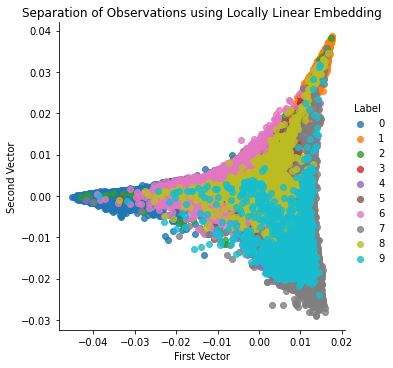

In [ ]:
# Locally Linear Embedding (LLE)
from sklearn.manifold import LocallyLinearEmbedding

n_neighbors = 10
n_components = 2
method = 'modified'
n_jobs = 4
random_state = 2018

lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, \
        n_components=n_components, method=method, \
        random_state=random_state, n_jobs=n_jobs)

lle.fit(X_train.loc[0:5000,:])
X_train_lle = lle.transform(X_train)
X_train_lle = pd.DataFrame(data=X_train_lle, index=train_index)

X_validation_lle = lle.transform(X_validation)
X_validation_lle = pd.DataFrame(data=X_validation_lle, index=validation_index)

scatterPlot(X_train_lle, y_train, "Locally Linear Embedding")

지역 선형 임베딩인 LLE 차원 축소 방법을 살펴보겠습니다.
이 방식은 비선형 차원 축소 방법으로 원본 피처 공간에서 축소된 공간을 데이터 투영시 거리를 유지하는 기법입니다.

이 알고리즘을 사용하셔야 할 때에는 '원하는 성분 수'와 '고려해야 할 포인트 수'를 설정해야하므로 잊지마세요😃

### t-SNE

In [ ]:
# Principal Component Analysis
from sklearn.decomposition import PCA

n_components = 784
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten, \
          random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=train_index)

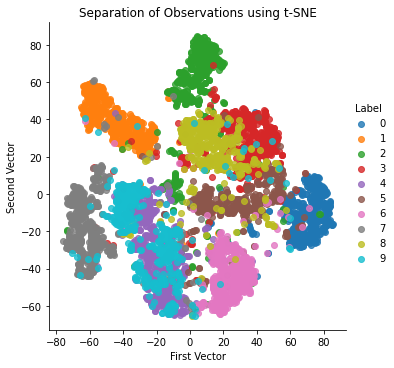

In [ ]:
# t-SNE
from sklearn.manifold import TSNE

n_components = 2
learning_rate = 300
perplexity = 30
early_exaggeration = 12
init = 'random'
random_state = 2018

tSNE = TSNE(n_components=n_components, learning_rate=learning_rate, \
            perplexity=perplexity, early_exaggeration=early_exaggeration, \
            init=init, random_state=random_state)

X_train_tSNE = tSNE.fit_transform(X_train_PCA.loc[:5000,:9])
X_train_tSNE = pd.DataFrame(data=X_train_tSNE, index=train_index[:5001])

scatterPlot(X_train_tSNE, y_train, "t-SNE")

t-SNE은 LLE와 마찬가지로 '비선형 차원 축소'기법입니다. 3차원 혹은 2차원 공간으로 모델링해 고차원 데이터를 수행하면서 두 확률 분포 간 쿨백-라이블러 발산을 최소화한다는 점이 이 알고리즘의 특수한 점입니다.

여기서도 LLE처럼 주의! 해야 하는 것이 하나 있는데요
바로 PCA와 같은 다른 차원 축소 기술을 이용해 차원 수를 줄인 다음 사용하는 것이 좋다는 것입니다. 다른 기술을 먼저 이용할 경우 노이즈를 줄이고 알고리즘 계산 속도가 빨라집니다!😆

In [ ]:
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)

### 사전 학습

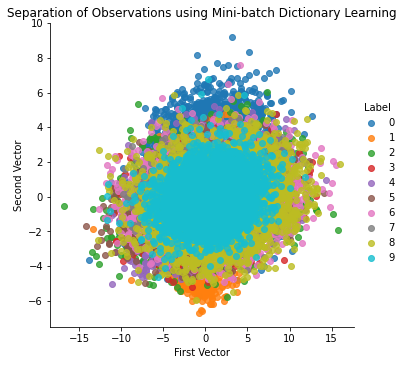

In [ ]:
# 미니-배치 사전 학습
from sklearn.decomposition import MiniBatchDictionaryLearning

n_components = 50 #성분수
alpha = 1
batch_size = 200 #배치크기
n_iter = 25  #반복수
random_state = 2018

#미니배치모델
miniBatchDictLearning = MiniBatchDictionaryLearning( \
                        n_components=n_components, alpha=alpha, \
                        batch_size=batch_size, n_iter=n_iter, \
                        random_state=random_state)

miniBatchDictLearning.fit(X_train.loc[:,:10000])
X_train_miniBatchDictLearning = miniBatchDictLearning.fit_transform(X_train)
X_train_miniBatchDictLearning = pd.DataFrame( \
    data=X_train_miniBatchDictLearning, index=train_index)

X_validation_miniBatchDictLearning = \
    miniBatchDictLearning.transform(X_validation)
X_validation_miniBatchDictLearning = \
    pd.DataFrame(data=X_validation_miniBatchDictLearning, \
    index=validation_index)

scatterPlot(X_train_miniBatchDictLearning, y_train, \
            "Mini-batch Dictionary Learning")

사전 학습은 '선형' '비선형' 어떤 기하학 구조나 거리 척도를 의존하지 않는 알고리즘 기법인데요 ! 원본 데이터의 희소 표현을 학습합니다.

위 기법과 유의한 점은 '성분의 수', '배치 크기','반복 횟수'를 설정한다는 것입니다.

### ICA

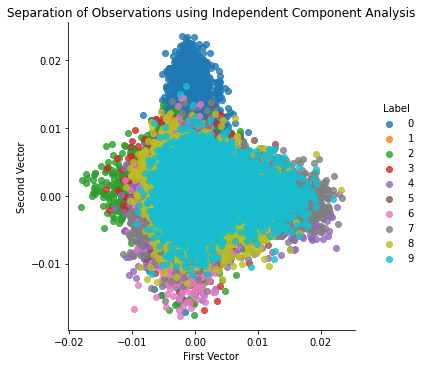

In [ ]:
# 독립 성분 분석
from sklearn.decomposition import FastICA

n_components = 25
algorithm = 'parallel'
whiten = True
max_iter = 100
random_state = 2018

ICA = FastICA(n_components=n_components, algorithm=algorithm, \
                  whiten=whiten, max_iter=max_iter, random_state=random_state)

X_train_ICA = ICA.fit_transform(X_train)
X_train_ICA = pd.DataFrame(data=X_train_ICA, index=train_index)

X_validation_ICA = ICA.transform(X_validation)
X_validation_ICA = pd.DataFrame(data=X_validation_ICA, \메모
                                    index=validation_index)

scatterPlot(X_train_ICA, y_train, "Independent Component Analysis")

마지막으로 ICA을 살펴보겠습니다. 독립 성분 분석으로 혼합 신호를 개별 성분으로 분리하는 방법입니다. 일반적으로 주어진 피처에 수많은 독립 신호가 함께 포함할 경우 개별 성분으로 분리해주는 알고리즘의 장점을 가지고 있습니다.

## 결론

지금까지 다양한 차원 축소 기법을 살펴보았습니다. 2차원 산점도를 이용하여 MNIST 관측치를 구분해본 결과
알고리즘의 특성에 따라 LLE는 삼각형 형태로 산점도 형태가 그려지는 등 다양한 형태로 구성되어 있는 경우를 볼 수 있었습니다.



이렇게 이번 시간에는 다양한 차원 축소 알고리즘을 살펴보았는데요.
차원 축소 알고리즘을 이용하여 MNIST 데이터셋의 손글씨 글자들을
비교적 쉽게 분리하고 이를 통해 비지도 학습 솔루션을 더 정확하게 구축할 수 있습니다.
다음 포스팅에서는 이번 시간에 다루지 못한 차원 축소 알고리즘에 대해 마저 알아볼게요 😃
긴 글 읽어주셔서 감사합니다:>!


참고 자료

https://lovit.github.io/nlp/representation/2018/09/28/mds_isomap_lle/

https://www.researchgate.net/figure/Overview-of-the-steps-involved-in-locally-linear-embedding_fig9_230595014

https://lovit.github.io/nlp/representation/2018/09/28/tsne/

https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf


https://junklee.tistory.com/13

https://lovit.github.io/machine%20learning/vector%20indexing/2018/03/28/lsh/

https://bskyvision.com/177

https://angeloyeo.github.io/2020/07/14/ICA.html